In [1]:
#import numpy as np
#import matplotlib.pyplot as plt
#import cProfile
#import mahotas
#import itk
#import skimage.feature as ft

#own libraries inside lib/ 
from lib.evaluator import *
from lib.features import *
from lib.shapes import *
#from lib.kneedata import *
from lib.plot import *
from lib.MLMethod import *
from lib.NaiveFeatures import *
import matplotlib.pyplot as plt
from lib.mrnetdata import *
from resultGenerator import *

Using TensorFlow backend.


In [7]:
from sklearn import preprocessing
import numpy as np
a = np.array([1,2,3])
a = a.reshape(-1,1)
preprocessing.normalize(a)

array([[1.],
       [1.],
       [1.]])

In [2]:
with open("pickled/results_"+"toy_data"+".pck",'rb') as fp:   
    [precisionRecalls,ROCs,AUCs,MAPs,evaluator_names] = pickle.load(fp)                    
#s = ShapeCreator()
##sq = s.makeSquare(24,4,2,2)
##p.plotSingleShape(sq)
#d = KneeData()
#d.loadData(from_original_files=True,pickled_db_path="pickled/erik_train.pck",path='/home/dawit/Datalogi/BachelorProjekt/data/erik/train_data/')
#haralicks = Haralicks(compute_dog=False)

In [3]:
e = Evaluator(d,haralicks,load_as_slice=True)

initialization finished


In [4]:
t,f = e.calcAuc(5,"ishealthy",True)

TypeError: cannot unpack non-iterable numpy.float64 object

In [7]:
a = 0.034569
str(round(a,3))

'0.035'

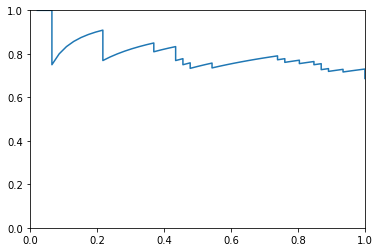

In [8]:
plt.axis([0,1,0,1])
plt.plot(t,f)
plt.show()

In [3]:
b = SimpleShapeData()
naive = NaiveFeatures()
e = Evaluator(data_obj=b,method_obj=naive,load_as_slice=False)

initialization finished


In [7]:
p,r = e.avgPrecisionRecallPoints(["shape"])

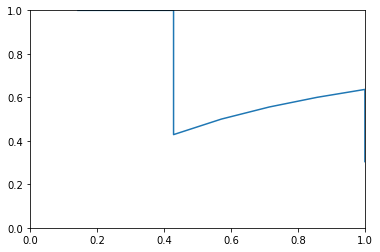

In [8]:
import matplotlib.pyplot as plt
plt.axis([0,1,0,1])
plt.plot(r,p)
plt.show()
#train_data,train_labels,test_data,test_labels = b.makeBatch()

In [5]:
indices,dist = e.query(0,8)

In [6]:

p = Plotter()
l = [0, 4, 6, 2, 22, 18, 20, 16]
for i in l:
    print(np.mean(b.scans[i]))
#    print(b.labels[i])
#    p.plotSingleShape(b.scans[i])

18.839385363520407
18.671675701530614
18.79364636479592
18.864795918367346
31.46843112244898
30.960220025510203
30.44692681760204
30.716278698979593


In [14]:
b.labels[5]

{'shape': 'triangle', 'offset': 'top-right', 'noise': 0.15}

mean: 18.839385363520407, dist:0.0
{'shape': 'triangle', 'offset': 'top-left', 'noise': 0.05}
mean: 18.864795918367346, dist:0.025410554846938993
{'shape': 'triangle', 'offset': 'bottom-left', 'noise': 0.05}
mean: 18.79364636479592, dist:0.045738998724488056
{'shape': 'triangle', 'offset': 'bottom-right', 'noise': 0.05}
mean: 18.671675701530614, dist:0.1677096619897931
{'shape': 'triangle', 'offset': 'top-right', 'noise': 0.05}
mean: 30.44692681760204, dist:11.607541454081634
{'shape': 'circle', 'offset': 'top-right', 'noise': 0.05}


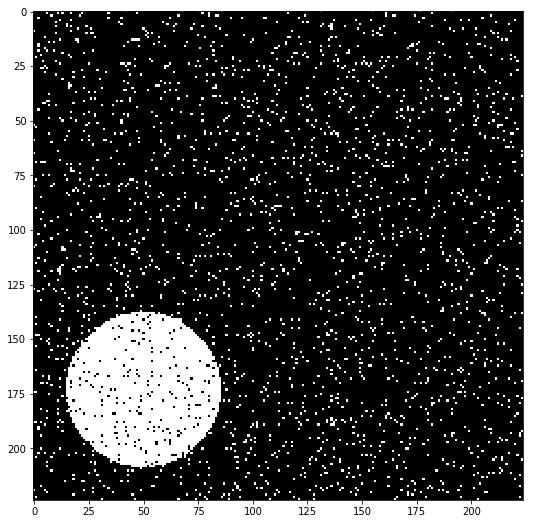

In [7]:
#p.plotSingleShape(train_data[1])
#p.saveFig(train_data[0],"pics/0n.png")
#p.saveFig(test_data[0],"pics/1n.png")
#p.saveFig(train_data[1],"pics/2n.png")
#p.saveFig(test_data[1],"pics/3n.png")   
names = ["pics/1st.png","pics/2nd.png","pics/3rd.png","pics/4th.png","pics/5th.png"]
for i in range(5):
    index = indices[i]
    name = names[i]
    p.saveFig(b.scans[index],name)
    print("mean: {}, dist:{}".format(np.mean(b.scans[index]),dist[i]))   
    print(b.labels[index])
#p.saveFig(b.scans[6],"pics/2nd.png")
#p.saveFig(b.scans[4],"pics/3rd.png")
#p.saveFig(b.scans[2],"pics/4th.png")   
#p.saveFig(b.scans[22],"pics/5th.png")   
#    
    

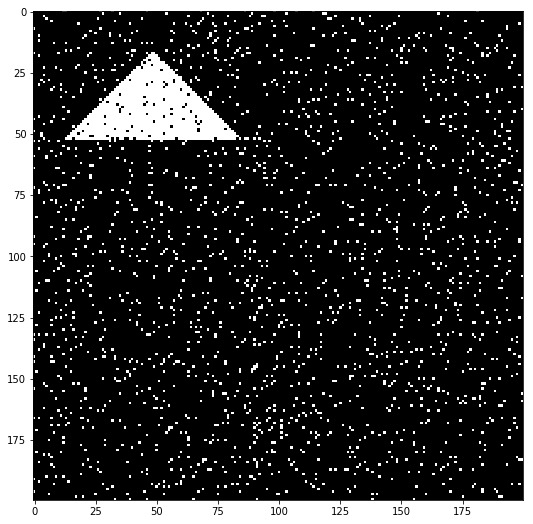

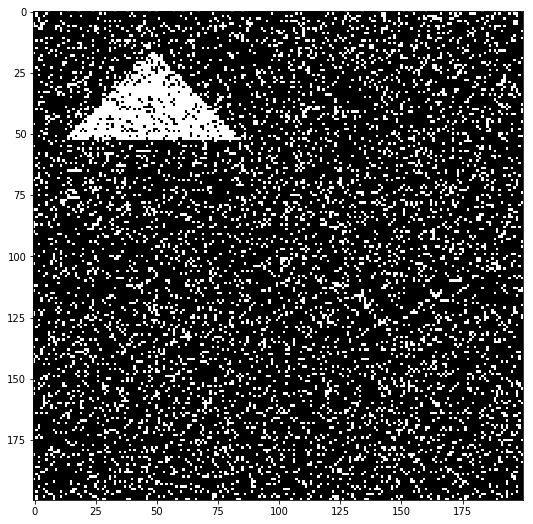

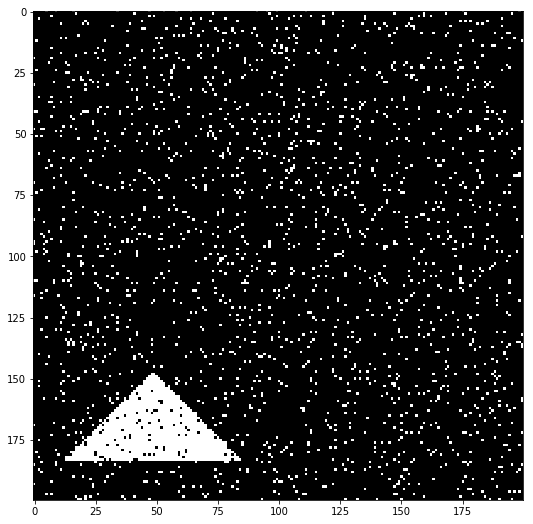

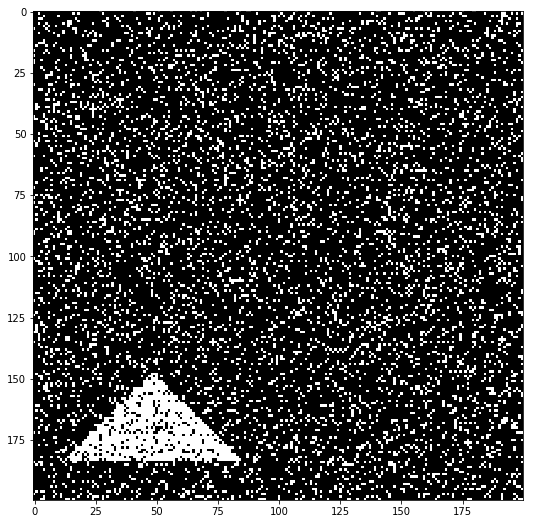

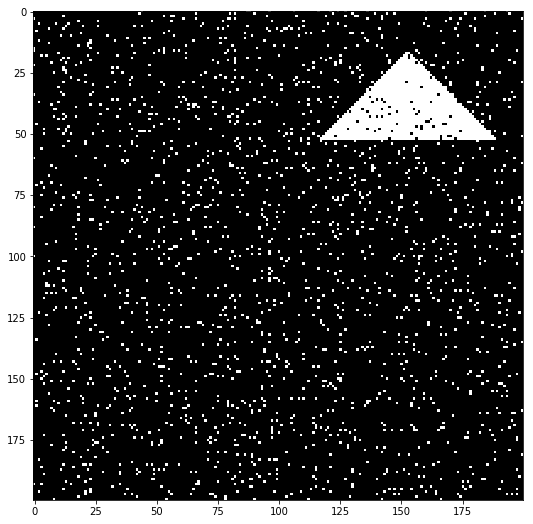

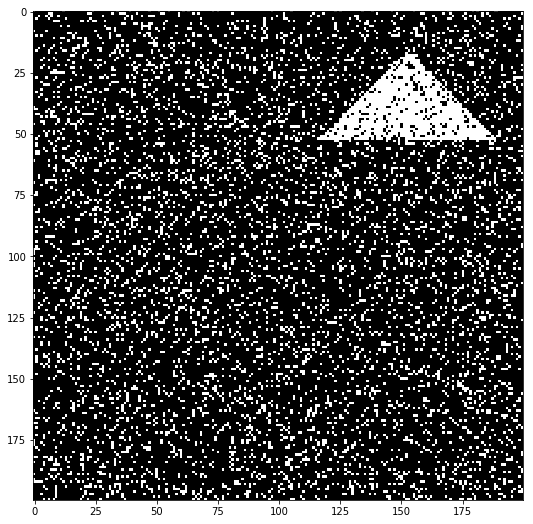

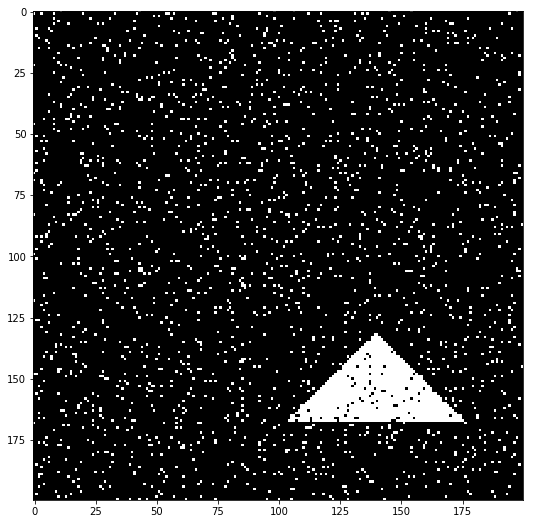

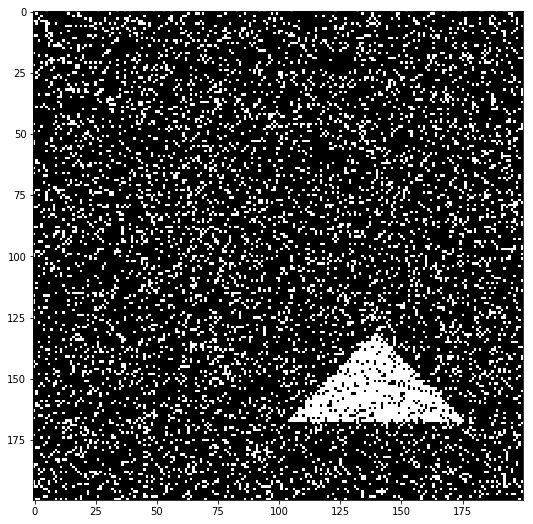

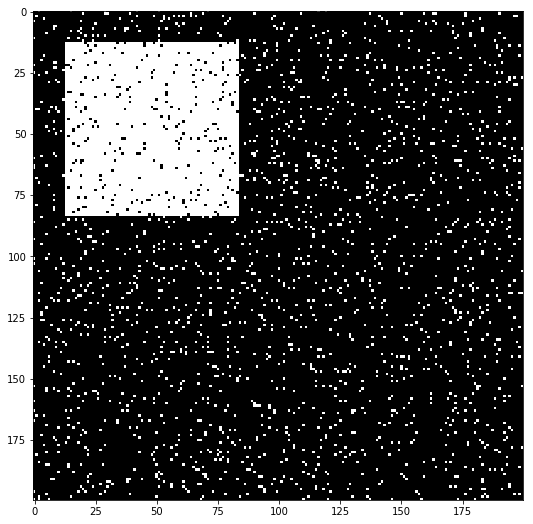

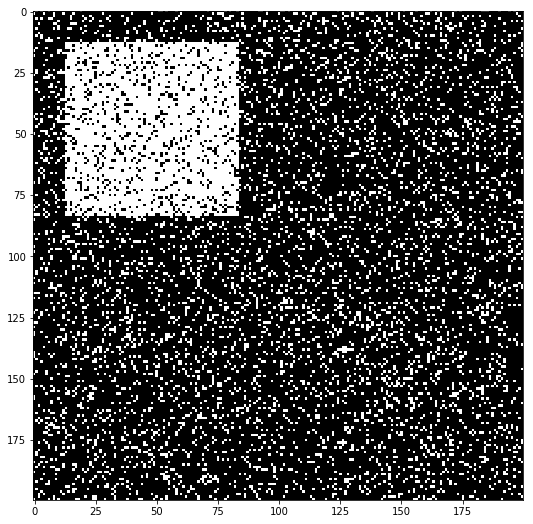

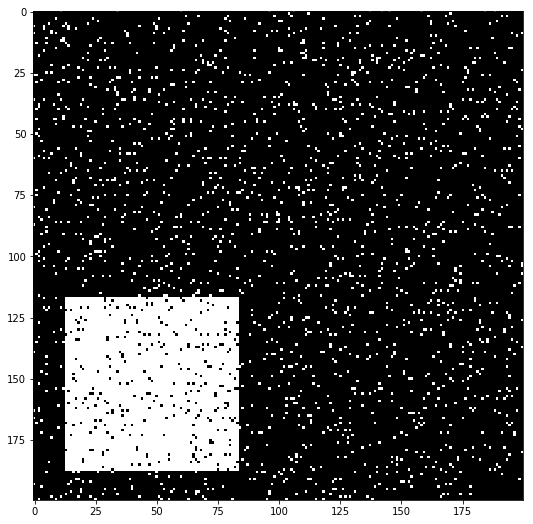

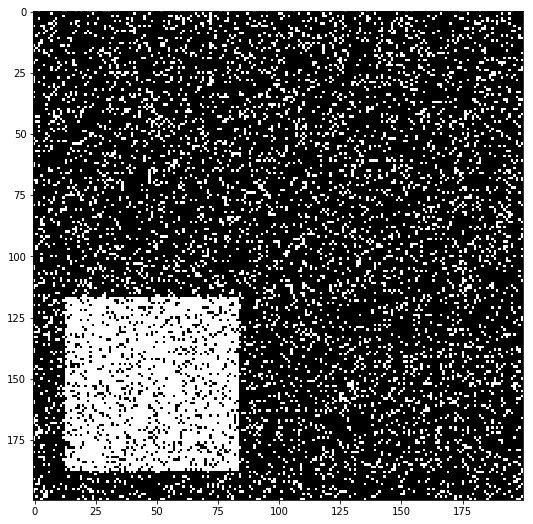

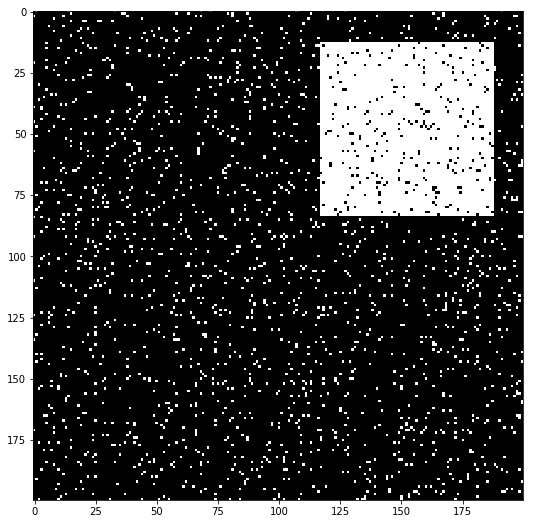

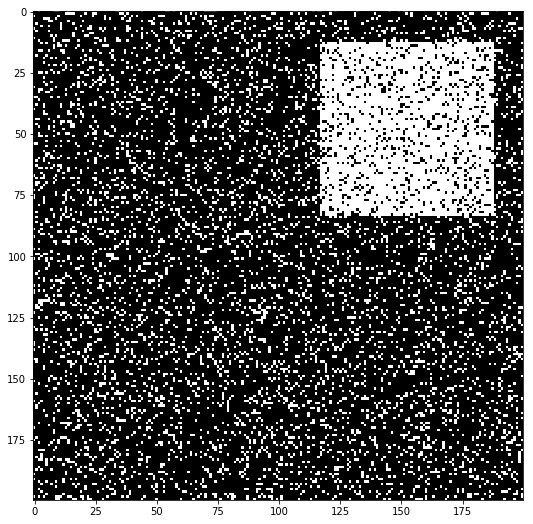

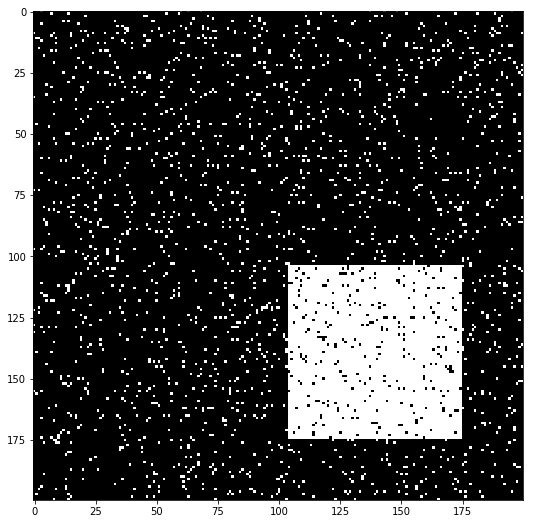

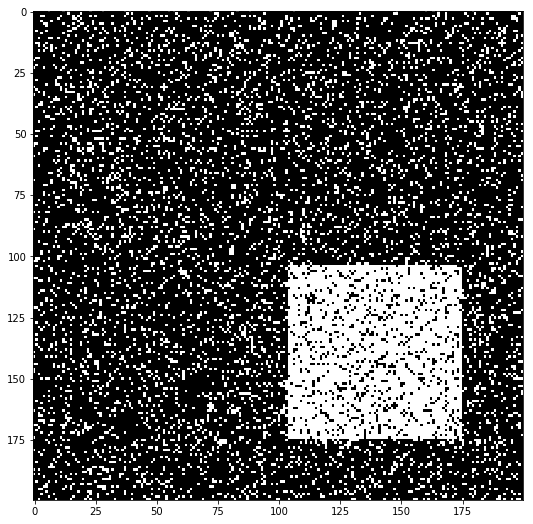

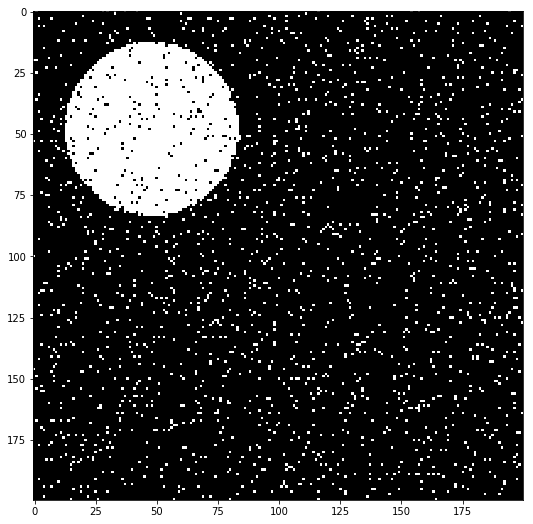

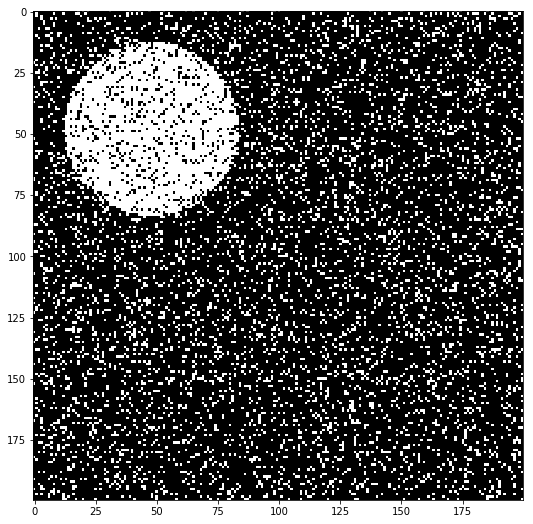

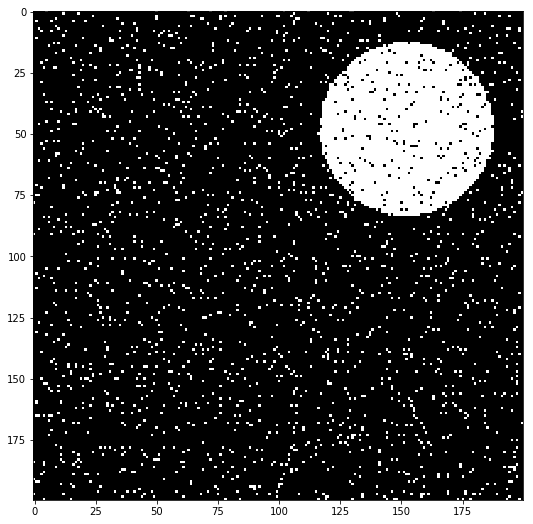

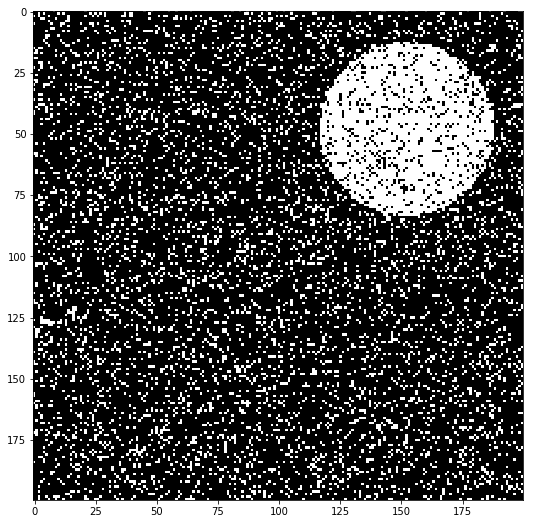

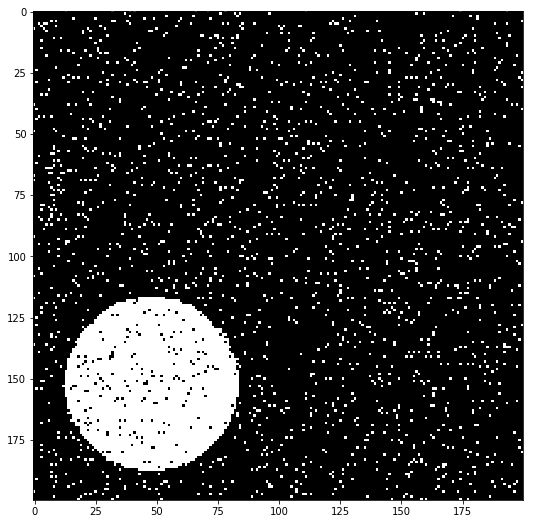

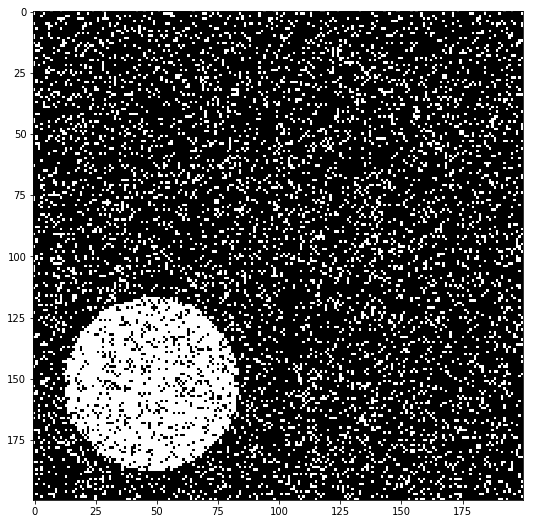

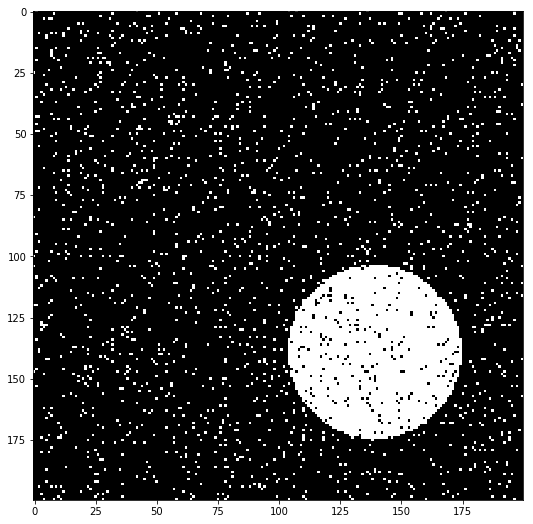

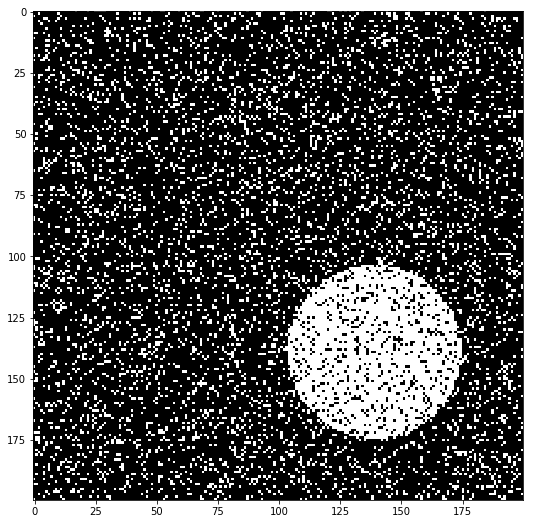

In [7]:
for i in b.scans:
    p.plotSingleShape(i)

In [7]:
np.mean(test_data[0])

NameError: name 'test_data' is not defined

In [3]:
p = Plotter()
finder = ImageFinder()
batchCreator = ShapeBatchCreator()
batch = batchCreator.makeBatch()
finder.extractFromBatch(batch)

enter


In [7]:
index = 0

In [10]:
finder.loadFeatures()
ids, dists,zero_lists = finder.match(batch[index])
zero_lists

[]

Original Image


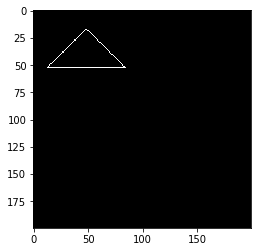

_____________
Distance:  0.0


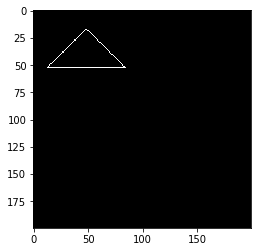

Distance:  0.23274830290087034


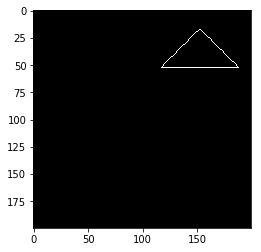

Distance:  0.3841027530412573


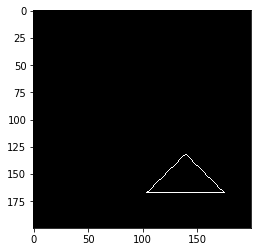

Distance:  0.7893934046819262


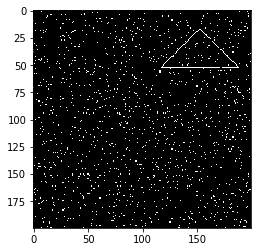

Distance:  0.7945723170466245


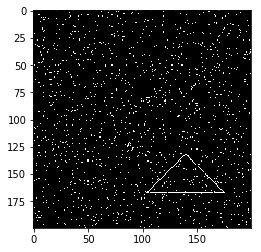

In [9]:
p.plotResults(batch,index,ids,dists)

In [ ]:
#finder = ImageFinder()
#
#batchcreator = ShapeBatchCreator()
#
#offsets = [[10,10],[40,40]]
#noises = [0.05,0.08]
#shapes = batchcreator.makeBatch(offsets_arg=offsets,noises_arg=noises)
#
#finder.setImageBank(shapes)
#
#model = SimpleModel()
#
#finder.setComparisonModel(model)
#
#
#
#index = 0
#indices,distances = finder.classify(shapes[index],return_size=5)
#p = Plotter()
#p.plotResults(shapes,index,indices,distances)

In [ ]:
batchCreator = ShapeBatchCreator()
offset_params = [40,70,90]
offsets = [[[i,10],[10,i],[i,i]] for i in offset_params ]
offsets = np.asarray(offsets)
offsets = offsets.reshape(-1,2)
noises = [0.01,0.02,0.05]
batch = batchCreator.makeBatch(offsets_arg=offsets,noises_arg=noises)
#finder = ImageFinder()
#finder.extractFromBatch(batch)

#p = Plotter()
#p.plotShapes(batch)
t = Tester(batch)
t.multipleCount(batch,10)
img_indices = t.countCorrectlyIdentified(batch)
imgs = [batch[i] for i in img_indices]
img_indices